In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris          # 鸢尾花数据集
from sklearn.model_selection import  train_test_split    # 拆分数据集
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix  # 混淆矩阵
import seaborn as sns
from sklearn.svm import SVC         # svm分类模型
from sklearn.metrics import accuracy_score, classification_report   # 准确率和分类评估报告
from sklearn.preprocessing import StandardScaler



plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 加载鸢尾花数据集
iris = load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [9]:
from sklearn.datasets import load_iris
# 加载数据
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['label'] = iris.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
# 查看数据集基本信息
data.info()
# 查看是否有缺失值
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
label                0
dtype: int64

In [11]:
# 查看数据集描述性统计
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


d:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Huawei\AppData\Local\Temp\ipykernel_29352\2734130518.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1200x800 with 0 Axes>

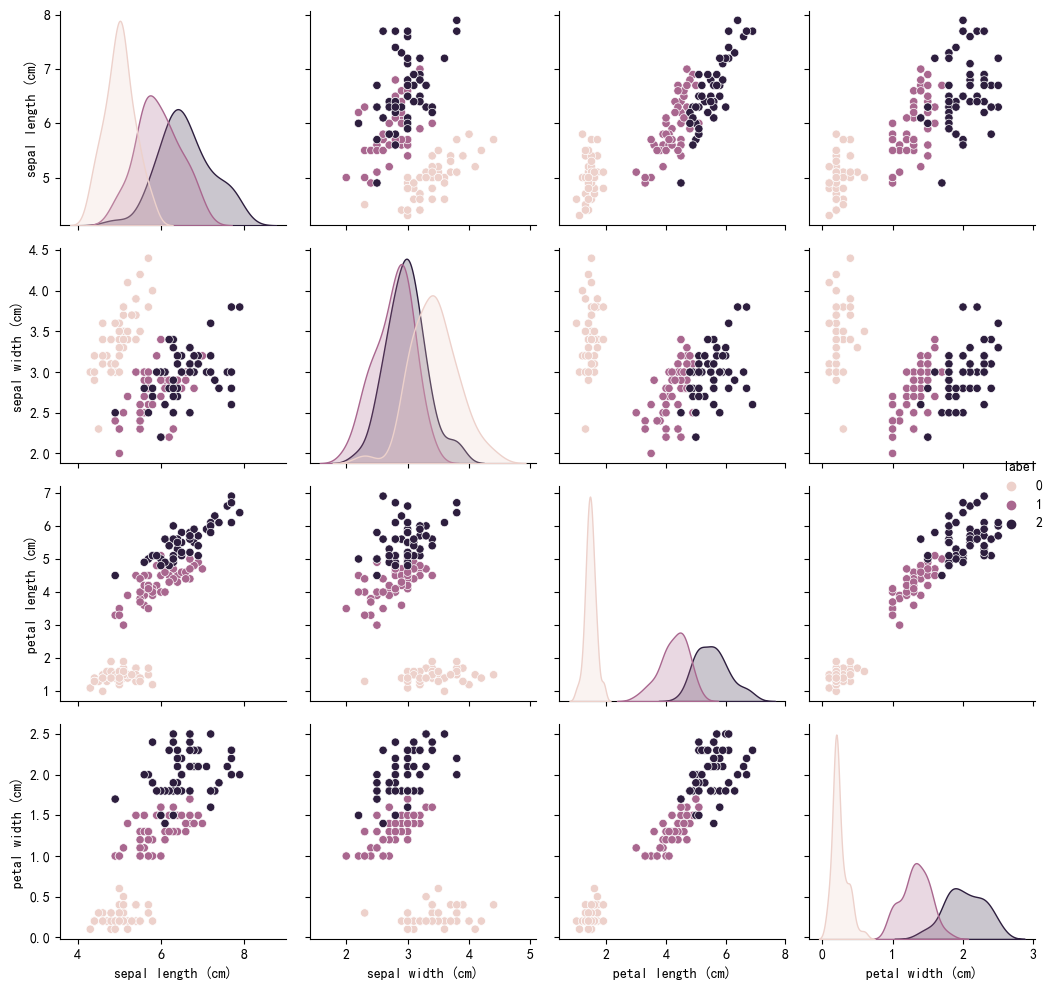

In [12]:
# 散点图矩阵
plt.figure(figsize=(12, 8))
sns.pairplot(data, hue='label')
plt.tight_layout()
plt.show()

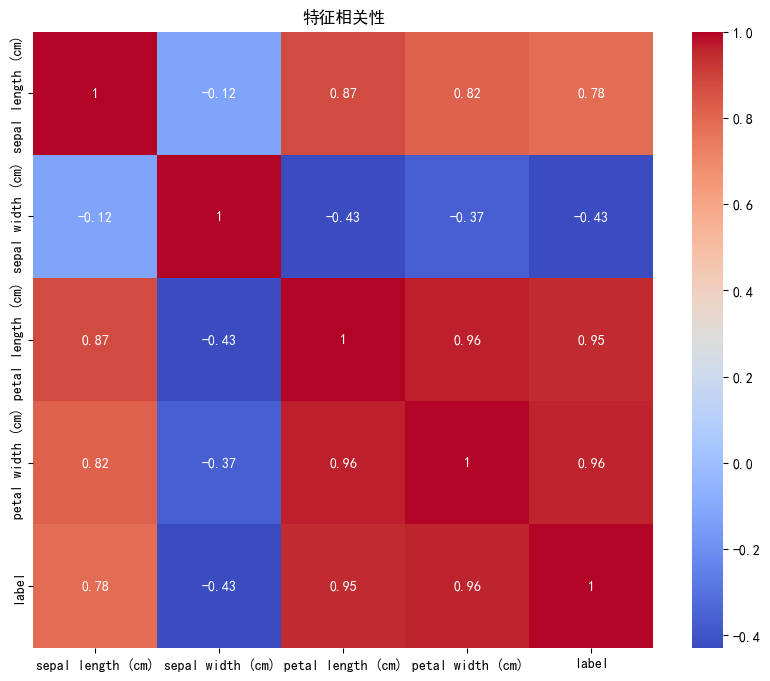

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('特征相关性')
plt.show()

In [14]:
# 1. 创建新特征（花瓣面积和萼片面积）
data['petal_area'] = data['petal length (cm)'] * data['petal width (cm)']
data['sepal_area'] = data['sepal length (cm)'] * data['sepal width (cm)']
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,petal_area,sepal_area
0,5.1,3.5,1.4,0.2,0,0.28,17.85
1,4.9,3.0,1.4,0.2,0,0.28,14.70
2,4.7,3.2,1.3,0.2,0,0.26,15.04
3,4.6,3.1,1.5,0.2,0,0.30,14.26
4,5.0,3.6,1.4,0.2,0,0.28,18.00


In [15]:
# 2. 数据标准化
# 分离特征和标签
X = data.drop('label', axis=1)
y = data['label']

# 特征标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
# 数据集划分, test_size=0.2 (80%作为训练数据集，20%作为测试数据集)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=21)

# 定义并训练SVM模型
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# 预测测试集
y_pred = model.predict(X_test)

# 评估模型
accuracy = accuracy_score(y_test, y_pred)
print(f"模型准确率: {accuracy:.2f}")

# 输出分类报告
print(classification_report(y_test, y_pred, target_names=iris.target_names))

模型准确率: 0.93
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.83      0.91        12
   virginica       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



[[11  0  0]
 [ 0 10  2]
 [ 0  0  7]]


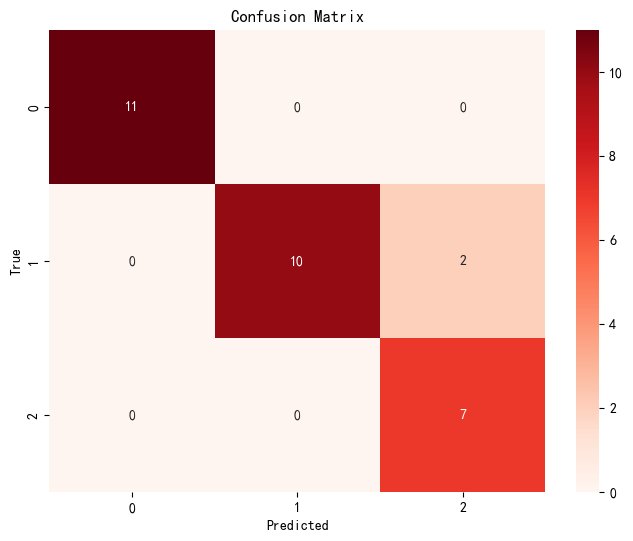

In [18]:
# 计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)
print(cm)

# 使用Seaborn进行可视化
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()